# Assignment 6

Name 1: Sangeet Sagar<br/>
Student id 1: 7009050<br/>
Email 1: sasa00001@stud.uni-saarland.de<br/>


Name 2: Nikhil Paliwal<br/>
Student id 2: 7009915<br/>
Email 2: nipa00002@stud.uni-saarland.de<br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python file for exercise 3. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
seaborn.set()
mpl.rcParams['figure.dpi'] = 120

## Exercise 1: MLE & MAP  (3 points)

Here is a nice [article](http://pages.cs.wisc.edu/~jerryzhu/cs838/LM.pdf) that explains the difference between MLE and MAP based estimation for language models. 

**1.1 (1 point)**

* Is a MAP estimator always better than MLE? Why is MAP preferred over MLE (explain in context of language modelling)? (0.5 points)

* Some smoothing methods use a MAP estimation of the model parameters. One of these is floor discounting, as described on Slide 44 in Chapter 5. <br/>
Write the formula for deriving the MAP estimate and the resultant formula for floor discounting. What underlying distribution does the language model assume? What is assumed as the prior? (0.5 pts)

**Answer** <br>
- MAP is preferred over MLE in cases where words in the vocabulary are missing in the training corpus. MAP takes care of zero probablity by assigning some probability mass from the higher counts to the zero counts. Thus MAP is capable to give probablity to any kind of text irrespective of its presence in the corpus. However, in cases where the training data is large enough that the chances of missing out any unseen tokens are slim, MLE can be used.

- Formula for deriving the MAP estimate
$$
P(w|h) = \frac{1}{z}(N(w, h) + \epsilon)
$$

Formula for floor discounting
$$
P(w|h) = \frac{N(w, h) + \epsilon}{N(h) + \epsilon \cdot V}
$$

Where:
- $N(w, h): $ Frequency of the combination  $h, w$
- $N(h): $ Frequency of $h$
- $\epsilon: $ discounting parameter, typically $ 0 < \epsilon \leq 1$

It assumes multinomial distribution with Dirichlet priors.


**1.2 (2 points)**

Consider the sentences

`s1 = They don't know that we know they know!`

`s2 = Don't we know that?`

* Assume punctuation removal and lowercasing as basic preprocessing steps. Formulate a bigram model (use a circular corpus) on `s1`, note down the conditional probabilities, and use them to determine the probability of `s2`. (0.5 pt)
* Now use floor discounting and form similar bigram models with $\epsilon=1$ and $\epsilon=0.5$, note down the respective bigram probabilities, and use them to determine the probability of `s2`. (1 pt) 
* What do you observe? How does the value of $\epsilon$ influence the MAP prior in both cases? (0.5 pts)

**Answer** <br>
1. 
s1 = `they dont know that we know they know` <br>
bigrams = ('they', 'dont'), ('dont', 'know'), ('know', 'that'), ('that', 'we'), ('we', 'know'), ('know', 'they'), ('they', 'know'), ('know', 'they') <br>

```
P(dont| they) = 0.500
P(know| dont) = 1.000
P(that| know) = 0.333
P(we| that) = 1.000
P(know| we) = 1.000
P(they| know) = 0.667
P(know| they) = 0.500


P(we| dont) = 0.000
P(know| we) = 1.000
P(that| know) = 0.333
P(dont| that) = 0.000

P(s2) = 0*1*0.333*0 = 0

```


2. 
$\epsilon = 0.5$

```
P(dont| they) = 0.333
P(know| dont) = 0.429
P(that| know) = 0.273
P(we| that) = 0.429
P(know| we) = 0.429
P(they| know) = 0.455
P(know| they) = 0.333


P(we| dont) = 0.143
P(know| we) = 0.429
P(that| know) = 0.273
P(dont| that) = 0.143

P(s2) = 0.143*0.429*0.273*0.143 = 0.00239
```

$\epsilon = 1$

```
P(dont| they) = 0.286
P(know| dont) = 0.333
P(that| know) = 0.250
P(we| that) = 0.333
P(know| we) = 0.333
P(they| know) = 0.375
P(know| they) = 0.286


P(we| dont) = 0.167
P(know| we) = 0.333
P(that| know) = 0.250
P(dont| that) = 0.167

P(s2) = 0.167*0.333*0.250*0.167 = 0.00232
```


3.

No smoothing | $\epsilon=0.5$ | $\epsilon=1$
- | - | -
![alt](image/1.png) | ![alt](image/2.png) | ![alt](image/3.png)

Observe that with $\epsilon=1$ the probablity distribution becomes more smooth. It means the sharing of probablities to lower counts was performed to higher extent than in the case with $\epsilon=0.5$

## Exercise 2: Good-Turing (3 points)

#### 2.1: Estimate of unknown words (0.5 points)

Imagine that you're given a split into (1) training data and (2) test data. They come from the same distribution but you're forbidden to make any other splits.

- What is the MLE estimate of frequency of unseen words on (2)?
- What other, better, strategy could be employed to estimate frequency of unseen words from (1) on (2)?

**Answer** <br>
- MLE estimate of frequency of unseen words are $0$.
- Frequency of such unseen words can be repalced with the net frequency of all singleton word types (i.e. total frequency of words whose frequency is 1).

#### 2.2: Data split (0.5 points)

- Usually when preparing a new model, we split the dataset to (1) training data, (2) held-out data and (3) test data. Comment briefly on what each part of the dataset is used for and especially on the distinction between (1) and (2).

**Answer** <br>
Held out data is used to set meta-parameters. We use training data to train some ngram model and using this we determine the (best) parameters (lambda) that gives the highest probablity on the held-out dataset. Those parameters are finally used to determine the distribution on the test data.



#### 2.3: Good-Turing Formula (1 point)

- What is the formula for updated counts for words of frequency $k \ne 0$?
- What is the Good-Turing formula for estimating unseen words, $k=0$?
- Given the updated counts $c^*_k$, how does Good-Turing estimate relate to language model smoothing? How do you define the smoothed distribution?
- Is there any systematic relationship between the original counts and the new counts? e.g. for large enough $k$, $c^*_k \ge k$. 
- Compute and compare the absolute frequencies and Good-Turing estimates for the words `three` and `syringes` in the following text.

```
thirty - three thousand three hundred and thirty silver syringes which cost three hundred and thirty - two crowns . .
```

**Answer**

1. 
$$
c^*_k = (c_k+1)\frac{N_{k+1}}{N_k}
$$

2. 
$$
c^*_k = \frac{N_{1}}{N}
$$
where: <br>
- $N_{k}$: Frequency of frequency of $k$ (i.e. freuency of all such words that occur $k$ times)

3. Good turing estimate actually follows the idea - Use the counts of what we have seen once to estimate things we have seen zero times. The smoothed distribution is a power law distribution.

4. Yes, for large enough $k$, $$c^*_k = c_k$$.

5. We have 
```
'thirty': 3,
'three': 3,
'hundred': 2,
'and': 2,
'thousand': 1,
'silver': 1,
'syringes': 1,
'which': 1,
'cost': 1,
'two': 1,
'crowns': 1
```
$N = 17$ <br>
$N_1 = 7$ <br>
$N_2 = 2$ <br>
$N_3 = 2$ <br>

- Seen thrice `three`
    - Take k = 3
    - MLE_p = $\frac{3}{17}$
    - $C^*({\text{three}}) = (3+1) \cdot \frac{N_4}{N_3} = 3$ (since $k$ is large here i.e maximum occurence, $c^* = c_k$. Therefore $c^* = 3$)
    - $P^*_{GT}(\text{three}) = \frac{3}{17} = 0.1764$
    - $P^*_{absolute}(\text{three}) = \frac{3}{17} = 0.1764$


- Seen once `syringes`
    - Take k = 1
    - MLE_p = $\frac{1}{17}$
    - $C^*({\text{syringes}}) = 2*\frac{N_2}{N_1} = 2*\frac{2}{7} = \frac{4}{7}$
    - $P^*_{GT}(\text{syringes}) = \frac{\frac{4}{7}}{17} = 0.0336$
    - $P^*_{absolute}(\text{syringes}) = \frac{1}{17} = 0.0588$
    

#### 2.4: Frequent buckets (1 point)

- In your own words, what is the issue with Good-Turing when estimating the new counts for the very frequent words?
- See page 5, paragraph 3 of [Good‐Turing Smoothing Without Tears](http://deanfoster.net/teaching/data_mining/good_turing.pdf) by Gale and Sampson (1995). What solution do they propose?

**Answer** <br>
Some known problems with good turing estimates:
- when $k$ is very large i.e. its values is equal to maximum occurence in the train corpus (for eg. $k$=3 and there are no items are that appear $k+1$ times), then there is possible conflict with the defined formula ($N_{k+1}=0$) as described in Section 2.3.1
- the probablities do not sum upto 1

Possible solutions:
- smooth $N_{k}$ counts so they all are non zero
- In the given article they discuss to setting $N_{k}=1$

## Exercise 3: Cross-Validation (4 points)

<!-- ### 3.0 Bible studies -->

Imagine you are a linguist in the remote future who just rediscovered a book called "Bible". To your disappointment the book is obviously incomplete; all the pages between Genesis and the Apocalypse are torn out, maybe by some late Christian cult. Since you don't know the language of the book you want to build a first language model that you can use if you find any of the lost parts. You digitize the book with your state-of-the art portable digitizer, and then load it into one of your Python 10.0 notebooks.

**3.1 Baseline (0.5 points)**

* The two corpora are in the text files `genesis.txt` and `apocalypsis.txt`. Load them into the notebook, preprocess them by removing all non-alphabetical characters, and then concatenate them into a single corpus. Split the corpus into a train and a test set, with the test set comprising the _last_ 20% of the corpus. You may use your code from previous exercises for this. (0.25 points)


In [2]:
# Load data
from pathlib import Path
import re
import random
import string
from importlib import reload
import exercise_3
exercise_3 = reload(exercise_3)

genesis_text = Path("data/genesis.txt").open('r').read()
apocalypsis_text = Path("data/apocalypsis.txt").open('r').read()

# preprocess
def preprocess(text):
    file_content = text.lower()
    file_content = file_content.translate(str.maketrans('', '', string.punctuation))
    tokens_list = file_content.split()
    return tokens_list

genesis_preprocessed = preprocess(genesis_text)
apocalypsis_preprocessd = preprocess(apocalypsis_text)

# concatenate
corpus = genesis_preprocessed + apocalypsis_preprocessd

# train, test split
train, test = exercise_3.train_test_split_data(corpus)

* Using your language model class from the previous assignment, estimate a trigram language model on the train set and report perplexity on the test. Use $\alpha=1$. Does this represent an unbiased estimate of the model's capacity? (0.25 points)

In [3]:
# TODO: trigram LM
import lm
lm = reload(lm)

N = 3
LM = lm.LanguageModel(train, test, N=N, alpha=1)
pp = LM.perplexity()

print('Perplexity of trigram LM = {}'.format(pp))

Perplexity of trigram LM = 3680.0276784664616


**Does this represent an unbiased estimate of the model's capacity?** <br>
No this does not represent the unbiased estimate as the corpus was not shuffled prior to LM training. The train set has many tokens missing from the test set becuase the train test split was performed in an imbalanced manner. The test set has tokens related to `apocalypsis.txt` while train set has tokens related to `genesis.txt`.

**3.2 Average Perplexity (2 points)**

* Since you want to get an unbiased estimate of your model's capacity, you decide to apply k-fold cross-validation on your corpus. To do this, implement the function `k_validation_folds` in `exercise_2.py`. Use it to split your corpus into $k=5$ cross-validation folds, and make sure that the folds are of the same size. (1 point)

* Now, estimate a trigram language model on each of the CV folds. You may again use your class from the previous assignment, and average over all perplexity scores. Does the average score differ from the one obtained in 3.2, and why? (1 point)

In [4]:
import numpy as np
exercise_3 = reload(exercise_3)
# 5-fold cross-validation
k_folds = 5
cv_folds = exercise_3.k_validation_folds(corpus, k_folds)



# estimate 5 trigram LMs!
pp_folds = np.zeros(k_folds)
for i in range(k_folds):
    train = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
    train = [item for sublist in train for item in sublist]
    LM = lm.LanguageModel(train, cv_folds[i], N=N, alpha=1)
    pp_folds[i] = LM.perplexity()
    
avrg_PP = np.sum(pp_folds)/k_folds
print('Average perplexity for 5-folds {}'.format(avrg_PP))

Average perplexity for 5-folds 2868.120649043175


**Does the average score differ from the one obtained in 3.2, and why?** <br>
Perplexity witout k-fold comes out to be 3680.027 and with k-fold comes to be 2868.120. This difference is due to the advantage that lies with k-fold CV. With k-fold every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased.

**3.3 Hyperparameter Tuning (1.5 points)**

* As you don't know anything about the language the book is written in, you have to find the best hyperparemter $\alpha$ for your model by a brute-force search (recall how you did this in the last assignment). Since you know from 3.2 that your data is not balanced, you decide to use only the averaged perplexity score (derived from $k=5$ CV folds) for this. Do so by completing the loop in the code cell below. Then, plot the obtained perplexity scores vs. $\alpha$. You do so by reusing the respective function from Assignment 5. (1 point)

(**Hint:** This could take a while.)

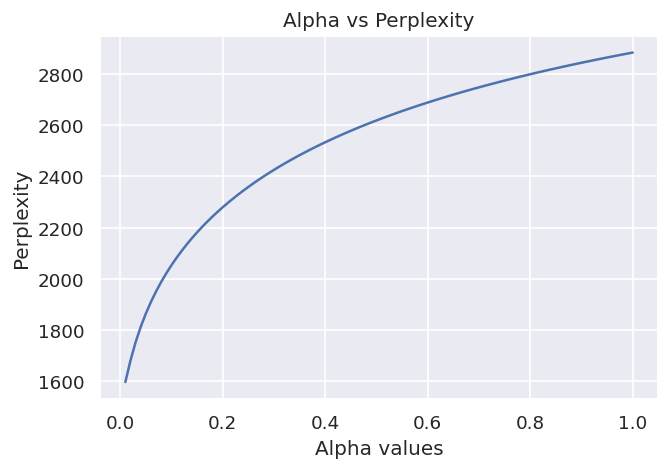

In [5]:
# hyperparamter tuning, CV
alphas = [x*0.01 for x in range(1,101)]
N = 3
PPs = []
for alpha in alphas:
    pp_folds = np.zeros(k_folds)
    for i in range(k_folds):
        train = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
        train = [item for sublist in train for item in sublist]
        LM = lm.LanguageModel(train, cv_folds[i], N=N, alpha=alpha)
        pp_folds[i] = LM.perplexity()

    avrg_PP = np.sum(pp_folds)/k_folds
    PPs.append(avrg_PP)

# TODO: plot!
exercise_3.plot_pp_vs_alpha(PPs, alphas)

* Repeat the tuning process for unigram and bigram language models. Does your estimate of $\alpha$ differ? Why? (0.5 points)

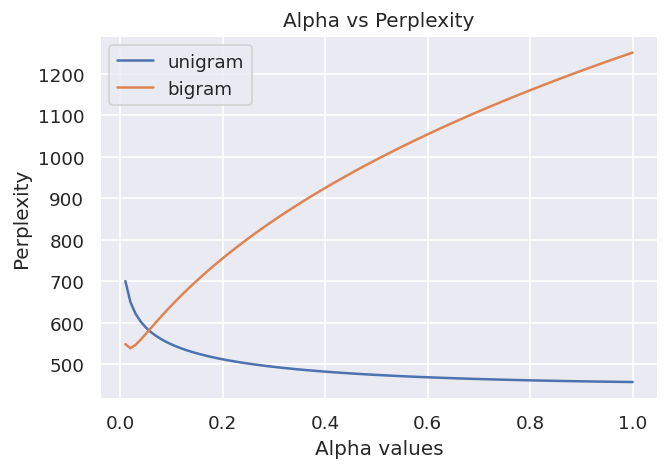

In [6]:
# hyperparamter tuning, bigram + trigram

PP_dict = dict()
N = 3
for n in range(1,N):
    PPs = []
    for alpha in alphas:
        pp_folds = np.zeros(k_folds)
        for i in range(k_folds):
            train = cv_folds[i-1:i] + cv_folds[i+1:] if i != 0 else cv_folds[i+1:]
            train = [item for sublist in train for item in sublist]
            LM = lm.LanguageModel(train, cv_folds[i], N=n, alpha=alpha)
            pp_folds[i] = LM.perplexity()

        avrg_PP = np.sum(pp_folds)/k_folds
        PPs.append(avrg_PP)
    PP_dict[n] = PPs


exercise_3 = reload(exercise_3)
exercise_3.plot_PPS_vs_alpha(PP_dict, alphas)

**Does your estimate of $\alpha$  differ? Why?** <br>
Yes. For trigrams and bigrams the perplexity increases with increase in value of alpha. Thus bigrams and trigrams are more favourable with lower alpha. However, for unigrams the reverse is true. With higher value of alpha, the perplexity increases.